In [2]:
import pandas as pd

In [3]:
from IPython.core.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))

C:\Users\linak\AppData\Local\Temp\ipykernel_8268\2986655314.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [4]:
df = pd.read_csv('Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# 1. EDA

## 데이터 셋 확인

In [5]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [6]:
df.count()

RowNumber             10000
CustomerId            10000
Surname               10000
CreditScore           10000
Geography             10000
Gender                10000
Age                   10000
Tenure                10000
Balance               10000
NumOfProducts         10000
HasCrCard             10000
IsActiveMember        10000
EstimatedSalary       10000
Exited                10000
Complain              10000
Satisfaction Score    10000
Card Type             10000
Point Earned          10000
dtype: int64

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [8]:
df.describe(include='object')

,Surname,Geography,Gender,Card Type
count,10000,10000,10000,10000
unique,2932,3,2,4
top,Smith,France,Male,DIAMOND
freq,32,5014,5457,2507


## heatmap으로 상관관계 시각화

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

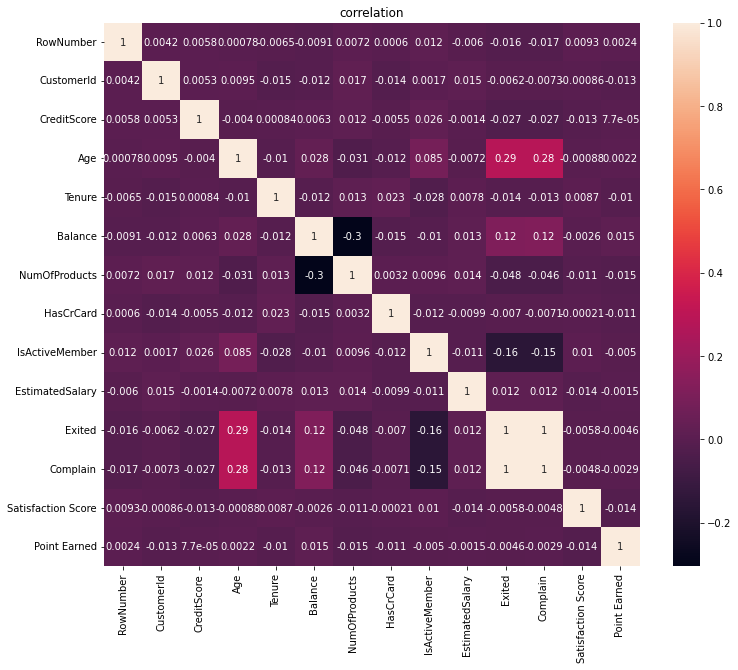

In [11]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)
plt.title('correlation')
plt.show()

Age, Balance, IsActiveMember 세 컬럼이 관계성이 높아보인다

### Age

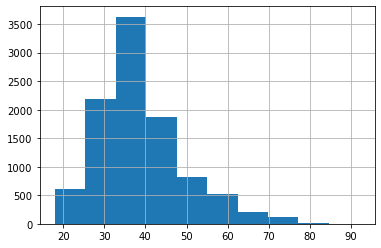

In [12]:
df['Age'].hist()
plt.show()

In [4]:
df['Age'].agg(['min', 'max', 'mean', 'median'])

min       18.0000
max       92.0000
mean      38.9218
median    37.0000
Name: Age, dtype: float64

#### 나이대 column을 새로 생성해 사용

In [14]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['00', '10', '20', '30', '40', '50', '60', '70', '80', '90']

df['AgeRange'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

df[['Age', 'AgeRange']].head()

,Age,AgeRange
0,42,40
1,41,40
2,42,40
3,39,30
4,43,40


#### AgeRange - Exited 비교

In [15]:
age_exit_sum = df.groupby('AgeRange')['Exited'].sum().reset_index()
age_exit_sum

,AgeRange,Exited
0,00,0
1,10,3
2,20,121
3,30,473
4,40,807
5,50,487
6,60,132
7,70,14
8,80,1
9,90,0


In [16]:
age_exit_mean = df.groupby('AgeRange')['Exited'].mean().reset_index()
age_exit_mean

,AgeRange,Exited
0,00,NaN
1,10,0.061224
2,20,0.076005
3,30,0.108836
4,40,0.308251
5,50,0.560414
6,60,0.352000
7,70,0.102941
8,80,0.076923
9,90,0.000000


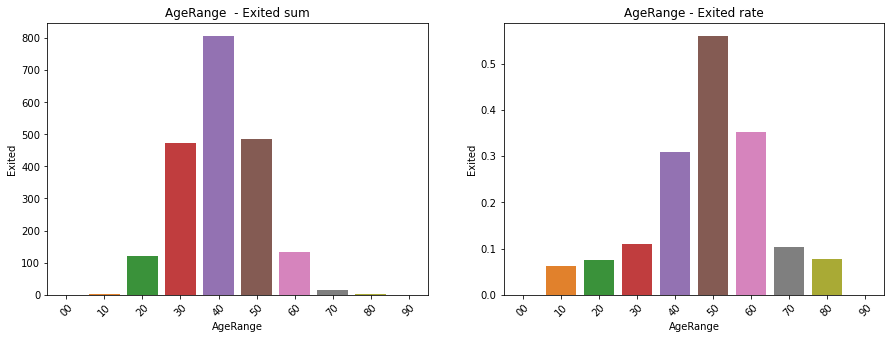

In [21]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='AgeRange', y='Exited', data=age_exit_sum)
plt.title('AgeRange  - Exited sum')
plt.xlabel('AgeRange')
plt.ylabel('Exited')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x='AgeRange', y='Exited', data=age_exit_mean)
plt.title('AgeRange - Exited rate')
plt.xlabel('AgeRange')
plt.ylabel('Exited')
plt.xticks(rotation=45)
plt.show()

이탈 인원수가 가장 많은 나이대는 40대, 이탈률이 가장 큰 나이대는 50대  
-> 그렇다면 40대와 50대의 특성을 찾아보는 것이 좋을 것 같다

### Balance

<AxesSubplot:>

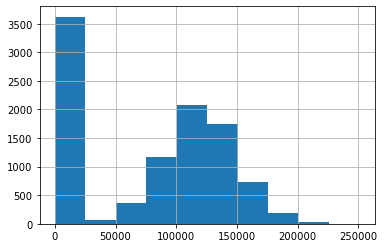

In [22]:
df['Balance'].hist()

#### 25k 간격만큼 나눠서 분류

In [23]:
balance_bins = range(0, 275001, 25000)
balance_labels = ['0', '25000', '50000', '75000', '100000', '125000', '150000', '175000', '200000', '225000', '250000']

df['BalanceRange'] = pd.cut(df['Balance'], bins=balance_bins, labels=balance_labels, right=False)

df[['Balance', 'BalanceRange']].head(10)

,Balance,BalanceRange
0,0.00,0
1,83807.86,75000
2,159660.80,150000
3,0.00,0
4,125510.82,125000
5,113755.78,100000
6,0.00,0
7,115046.74,100000
8,142051.07,125000
9,134603.88,125000


#### BalanceRange - Exited 비교

In [24]:
balance_exit_sum = df.groupby('BalanceRange')['Exited'].sum().reset_index()
balance_exit_sum

,BalanceRange,Exited
0,0,504
1,25000,22
2,50000,75
3,75000,226
4,100000,558
5,125000,429
6,150000,156
7,175000,49
8,200000,17
9,225000,1


In [25]:
balance_exit_mean = df.groupby('BalanceRange')['Exited'].mean().reset_index()
balance_exit_mean

,BalanceRange,Exited
0,0,0.139111
1,25000,0.318841
2,50000,0.214900
3,75000,0.194828
4,100000,0.269826
5,125000,0.243473
6,150000,0.211382
7,175000,0.248731
8,200000,0.531250
9,225000,1.000000


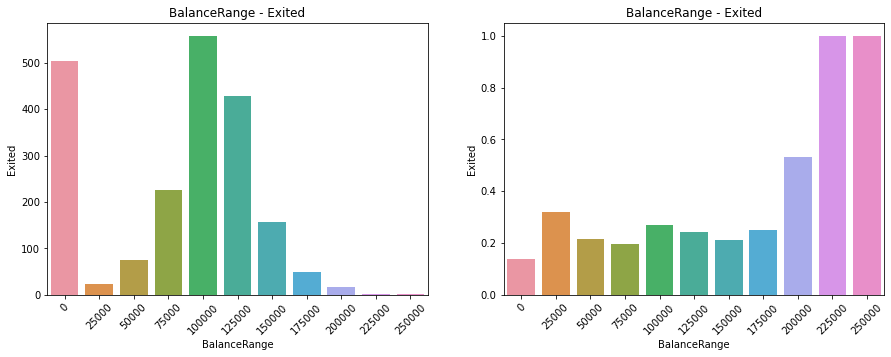

In [26]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='BalanceRange', y='Exited', data=balance_exit_sum)
plt.title('BalanceRange - Exited')
plt.xlabel('BalanceRange')
plt.ylabel('Exited')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x='BalanceRange', y='Exited', data=balance_exit_mean)
plt.title('BalanceRange - Exited')
plt.xlabel('BalanceRange')
plt.ylabel('Exited')
plt.xticks(rotation=45)
plt.show()

225k, 250k에서 이탈율이 높게 나타나는 이유는 애초에 인원수가 많지 않아서라고 생각된다    
이탈 인원수가 많은 100k 구간의 특성을 찾아보는게 좋을듯?

### IsActiveMember

<AxesSubplot:>

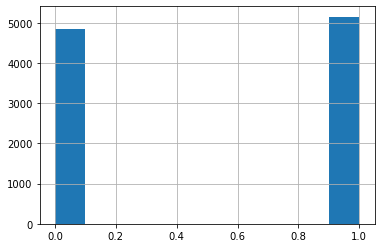

In [27]:
df['IsActiveMember'].hist()

#### Active - Exited 비교

In [28]:
active_exit = df.groupby('IsActiveMember')['Exited'].sum().reset_index()
active_exit

,IsActiveMember,Exited
0,0,1303
1,1,735


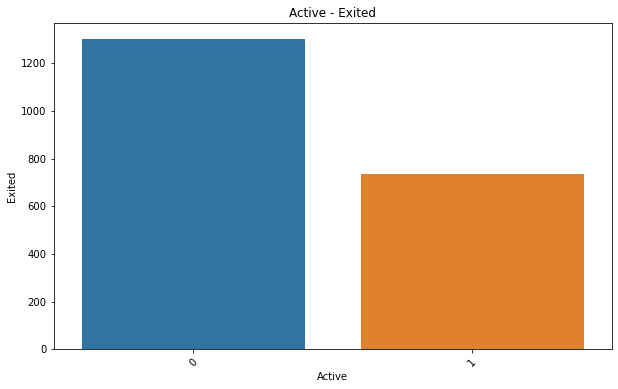

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='IsActiveMember', y='Exited', data=active_exit)
plt.title('Active - Exited')
plt.xlabel('Active')
plt.ylabel('Exited')
plt.xticks(rotation=45)
plt.show()

Active X인 고객이 이탈률이 높다 -> 당연한 결과?  
비활성 고객을 활성으로 돌릴 방법을 찾는 방향

### Gender

<AxesSubplot:>

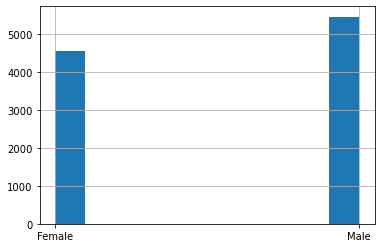

In [30]:
df['Gender'].hist()

#### Gender - Exited 비교

In [31]:
gender_exit = df.groupby('Gender')['Exited'].sum().reset_index()
gender_exit

,Gender,Exited
0,Female,1139
1,Male,899


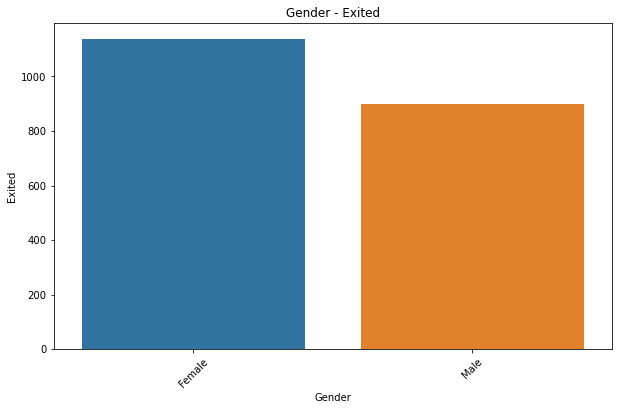

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Exited', data=gender_exit)
plt.title('Gender - Exited')
plt.xlabel('Gender')
plt.ylabel('Exited')
plt.xticks(rotation=45)
plt.show()

In [33]:
gender_exit_rate = df.groupby('Gender')['Exited'].mean().reset_index()
gender_exit_rate

,Gender,Exited
0,Female,0.250715
1,Male,0.164743


Female의 이탈 인원수도 이탈률도 Male보다 크게 나타난다  
-> Female과 연관된 column을 찾아 해결책을 구성

### Card Type

<AxesSubplot:>

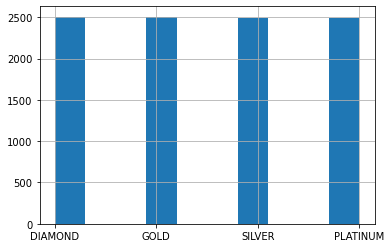

In [34]:
df['Card Type'].hist()

#### Card Type - Exited 비교

In [35]:
card_exit_sum = df.groupby('Card Type')['Exited'].sum().reset_index()
card_exit_sum

,Card Type,Exited
0,DIAMOND,546
1,GOLD,482
2,PLATINUM,508
3,SILVER,502


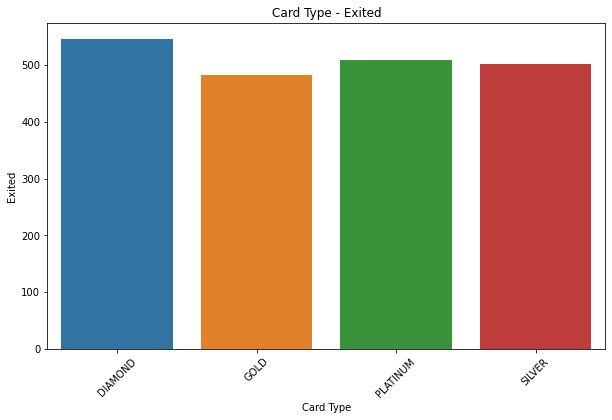

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Card Type', y='Exited', data=card_exit_sum)
plt.title('Card Type - Exited')
plt.xlabel('Card Type')
plt.ylabel('Exited')
plt.xticks(rotation=45)
plt.show()

Diamond 등급이 가장 이탈 고객이 많지만 유의미한 차이가 존재하는지는 모르겠다

# 2. 요인 구체화

## Column 별 특성 찾기 - 이탈의 이유

### Age

#### Numeric Column - 평균값

In [38]:
exit_customer = df[df['Exited'] == 1]
not_exit_customer = df[df['Exited'] == 0]

# Credit Score
age_cs = df.groupby('AgeRange')['CreditScore'].mean().reset_index()
age_cs_not_exit = not_exit_customer.groupby('AgeRange')['CreditScore'].mean().reset_index()
age_cs_exit = exit_customer.groupby('AgeRange')['CreditScore'].mean().reset_index()

# Balance
age_b = df.groupby('AgeRange')['Balance'].mean().reset_index()
age_b_not_exit = not_exit_customer.groupby('AgeRange')['Balance'].mean().reset_index()
age_b_exit = exit_customer.groupby('AgeRange')['Balance'].mean().reset_index()

# NumOfProducts
age_n = df.groupby('AgeRange')['NumOfProducts'].mean().reset_index()
age_n_not_exit = not_exit_customer.groupby('AgeRange')['NumOfProducts'].mean().reset_index()
age_n_exit = exit_customer.groupby('AgeRange')['NumOfProducts'].mean().reset_index()

# Tenure
age_t = df.groupby('AgeRange')['Tenure'].mean().reset_index()
age_t_not_exit = not_exit_customer.groupby('AgeRange')['Tenure'].mean().reset_index()
age_t_exit = exit_customer.groupby('AgeRange')['Tenure'].mean().reset_index()

# Salary
age_s = df.groupby('AgeRange')['EstimatedSalary'].mean().reset_index()
age_s_not_exit = not_exit_customer.groupby('AgeRange')['EstimatedSalary'].mean().reset_index()
age_s_exit = exit_customer.groupby('AgeRange')['EstimatedSalary'].mean().reset_index()

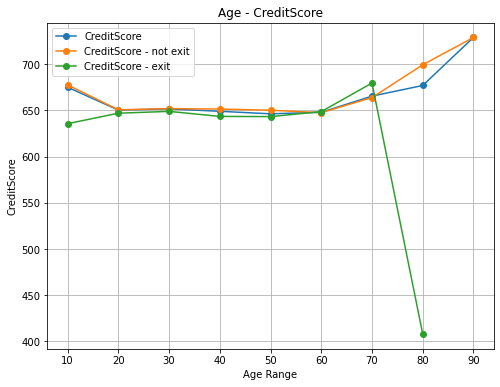

In [39]:
plt.figure(figsize=(8, 6))

plt.plot(age_cs['AgeRange'], age_cs['CreditScore'], marker='o', label='CreditScore')
plt.plot(age_cs_not_exit['AgeRange'], age_cs_not_exit['CreditScore'], marker='o', label='CreditScore - not exit')
plt.plot(age_cs_exit['AgeRange'], age_cs_exit['CreditScore'], marker='o', label='CreditScore - exit')

plt.title('Age - CreditScore')
plt.xlabel('Age Range')
plt.ylabel('CreditScore')

plt.legend()

plt.grid(True)
plt.show()

40대, 50대에서 큰 특성이 나타나지 않았다  
파란색 그래프 - 전체 사람들의 나이대 별 Credit Score  
주황색 그래프 - 이탈한 사람들의 나이대 별 Credit Score  
-> 전체적으로 이탈하는 사람의 Credit Score가 이탈하지 않은 사람의 Credit Score보다 낮게 나오는 편  
-> 10대, 80대는 이탈하는 사람의 Credit Score이 많이 낮음 (대상으로 하는 마케팅?)  

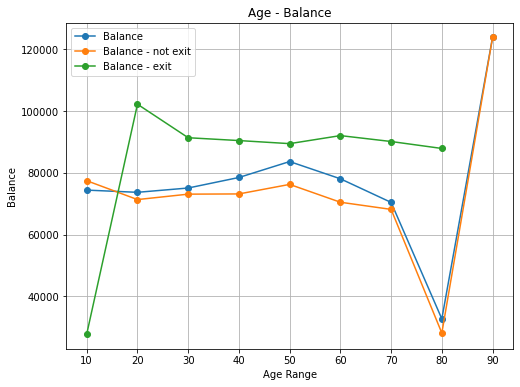

In [40]:
plt.figure(figsize=(8, 6))

plt.plot(age_b['AgeRange'], age_b['Balance'], marker='o', label='Balance')
plt.plot(age_b_not_exit['AgeRange'], age_b_not_exit['Balance'], marker='o', label='Balance - not exit')
plt.plot(age_b_exit['AgeRange'], age_b_exit['Balance'], marker='o', label='Balance - exit')

plt.title('Age - Balance')
plt.xlabel('Age Range')
plt.ylabel('Balance')

plt.legend()

plt.grid(True)
plt.show()

그래프에서 40대, 50대만의 큰 특징이 보이는 것 같진 않음  
전체적으로 이탈한 사람이 이탈하지 않은 사람에 비해 balance가 높다  
-> 예외적인 나이대: 10대 (이탈한 사람의 balance가 이탈하지 않은 사람의 balance보다 낮은 유일한 경우)  
-> 이탈하지 않은 80대의 balance가 매우 낮음도 하나의 특징이 될 수 있을듯

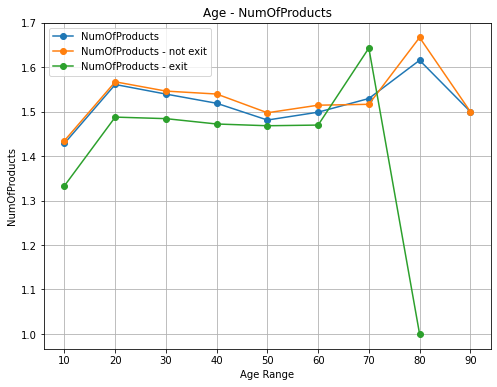

In [41]:
plt.figure(figsize=(8, 6))

plt.plot(age_n['AgeRange'], age_n['NumOfProducts'], marker='o', label='NumOfProducts')
plt.plot(age_n_not_exit['AgeRange'], age_n_not_exit['NumOfProducts'], marker='o', label='NumOfProducts - not exit')
plt.plot(age_n_exit['AgeRange'], age_n_exit['NumOfProducts'], marker='o', label='NumOfProducts - exit')

plt.title('Age - NumOfProducts')
plt.xlabel('Age Range')
plt.ylabel('NumOfProducts')

plt.legend()

plt.grid(True)
plt.show()

전체적으로 이탈한 사람들의 보유 수가 이탈하지 않은 사람들의 보유 수보다 낮음  
-> 특수 케이스: 70대 (이탈한 사람의 보유 수가 더 많음)  
-> 극단적 케이스: 80대 (이탈한 사람의 보유 수가 다른 나이대에 비해 극단적으로 적음) 

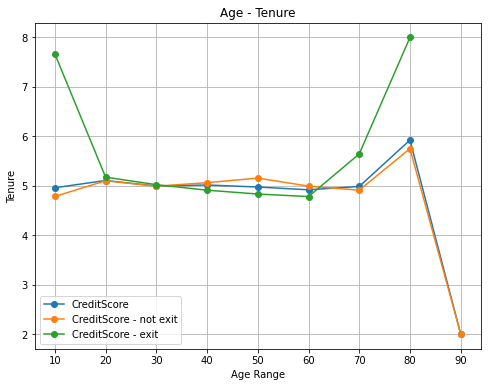

In [42]:
plt.figure(figsize=(8, 6))

plt.plot(age_t['AgeRange'], age_t['Tenure'], marker='o', label='CreditScore')
plt.plot(age_t_not_exit['AgeRange'], age_t_not_exit['Tenure'], marker='o', label='CreditScore - not exit')
plt.plot(age_t_exit['AgeRange'], age_t_exit['Tenure'], marker='o', label='CreditScore - exit')

plt.title('Age - Tenure')
plt.xlabel('Age Range')
plt.ylabel('Tenure')

plt.legend()

plt.grid(True)
plt.show()

40대, 50대에서는 초록색 그래프가 주황색 그래프보다 낮음을 확인할 수 있다  
-> 40대, 50대에서는 두 번째 가설이 맞았다 - 장기고객이 이탈하지 않음  

10대와 70대, 80대에서 이탈자의 평균 사용기간이 길다  
-> 70대, 80대는 전체 나이대에서 고령에 속하기 때문에 가설이 어느정도 맞았음을 확인할 수 있다)  

특수 케이스: 10대, 70대, 80대 - 다른 나이대들과 다르게 이탈한 사람의 사용 기간이 더 길고 특히 10대와 80대는 이탈하지 않은 사람과 크게 차이가 있다 (장기고객일수록 이탈자가 적으려면 초록색 그래프가 전체적으로 주황색 그래프보다 내려가 있어야 하기 때문에 여러 나이대에서 두 번째 가설이 틀렸음을 확인할 수 있다)    

따라서 많은 이탈자가 있는 40대, 50대를 위한 방안 (ex. 이용한지 얼마 되지 않은 고객을 향한 방안) 과 장기고객 이탈자가 많은 10대, 70대, 80대를 위한 방안 (장기고객을 위한 우대 혜택) 중 고민할 필요가 있어보임


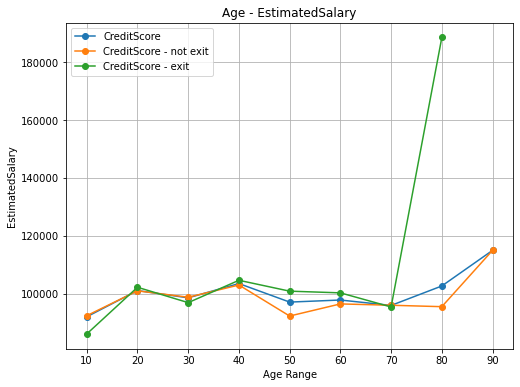

In [43]:
plt.figure(figsize=(8, 6))

plt.plot(age_s['AgeRange'], age_s['EstimatedSalary'], marker='o', label='CreditScore')
plt.plot(age_s_not_exit['AgeRange'], age_s_not_exit['EstimatedSalary'], marker='o', label='CreditScore - not exit')
plt.plot(age_s_exit['AgeRange'], age_s_exit['EstimatedSalary'], marker='o', label='CreditScore - exit')

plt.title('Age - EstimatedSalary')
plt.xlabel('Age Range')
plt.ylabel('EstimatedSalary')

plt.legend()

plt.grid(True)
plt.show()

#### String Column - 최빈값

In [44]:
exit_customer = df[df['Exited'] == 1]
not_exit_customer = df[df['Exited'] == 0]

organize = pd.DataFrame()

# Geography
age_gg = df.groupby('AgeRange')['Geography'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
age_gg_not_exit = not_exit_customer.groupby('AgeRange')['Geography'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
age_gg_exit = exit_customer.groupby('AgeRange')['Geography'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)

# Gender
age_g = df.groupby('AgeRange')['Gender'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
age_g_not_exit = not_exit_customer.groupby('AgeRange')['Gender'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
age_g_exit = exit_customer.groupby('AgeRange')['Gender'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)

# IsActiveMember
age_iam = df.groupby('AgeRange')['IsActiveMember'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
age_iam_not_exit = not_exit_customer.groupby('AgeRange')['IsActiveMember'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
age_iam_exit = exit_customer.groupby('AgeRange')['IsActiveMember'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)

# Complain
age_c = df.groupby('AgeRange')['Complain'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
age_c_not_exit = not_exit_customer.groupby('AgeRange')['Complain'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
age_c_exit = exit_customer.groupby('AgeRange')['Complain'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)

organize['Geography'] = age_gg
organize['Geography_not_exit'] = age_gg_not_exit
organize['Geography_exit'] = age_gg_exit
organize['Gender'] = age_g
organize['Gender_not_exit'] = age_g_not_exit
organize['Gender_exit'] = age_g_exit
organize['Active'] = age_iam
organize['Active_not_exit'] = age_iam_not_exit
organize['Active_exit'] = age_iam_exit
organize['Complain'] = age_c
organize['Complain_not_exit'] = age_c_not_exit
organize['Complain_exit'] = age_c_exit
organize

,Geography,Geography_not_exit,Geography_exit,Gender,Gender_not_exit,Gender_exit,Active,Active_not_exit,Active_exit,Complain,Complain_not_exit,Complain_exit
AgeRange,,,,,,,,,,,,
00,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
10,France,France,France,Male,Male,Male,1.0,1.0,1.0,0.0,0.0,1.0
20,France,France,Germany,Male,Male,Female,1.0,1.0,0.0,0.0,0.0,1.0
30,France,France,Germany,Male,Male,Female,1.0,1.0,0.0,0.0,0.0,1.0
40,France,France,Germany,Male,Male,Female,0.0,1.0,0.0,0.0,0.0,1.0
50,France,France,France,Male,Male,Female,1.0,1.0,0.0,1.0,0.0,1.0
60,France,France,France,Male,Male,Female,1.0,1.0,0.0,0.0,0.0,1.0
70,France,France,Germany,Female,Male,Female,1.0,1.0,0.0,0.0,0.0,1.0
80,France,France,France,Male,Male,Female,1.0,1.0,0.0,0.0,0.0,1.0


1. Geography  
-> 이탈하지 않은 사람들의 최빈값은 모두 France  
-> 이탈한 사람들 중 20대, 30대, 40대, 70대의 최빈값은 Germany  
-> 따라서 독일의 특정 연령대에서 많은 이탈률을 보이는 것을 확인할 수 있다 (절대적인 이용자 수는 프랑스가 많음)

2. Gender
-> 70대를 제외한 모든 나이대에서 남자 이용자가 더 많음을 확인  
-> 이탈하지 않은 사람들은 모든 나이대에서 남자가 더 많다  
-> 10대를 제외한 모든 나이대의 이탈한 사람들은 여자가 더 많다  
-> 따라서 대부분의 연령대에서 여성이 많은 이탈률을 보이는 것을 확인할 수 있다  

3. Active    
-> 40대를 제외한 모든 연령대에서 활성 이용자가 더 많음 (가장 이탈 인원수가 많은 40대의 특징이 될 수 있을 것 같다)  
-> 모든 연령대의 이탈하지 않은 사람들은 활성 이용자가 더 많다  
-> 50대를 제외한 모든 연령대의 이탈한 사람들은 비활성 이용자가 더 많다 (이탈률이 가장 높은 50대의 특징이 될 수 있을듯)  

4. Complain  
-> 50대를 제외한 모든 연령대에서 불만이 없는 이용자가 더 많음 (가장 이탈률이 높은 50대)  
-> 이탈하지 않은 사람들과 이탈한 사람들은 모든 연령대에서 최빈값이 동일(0/1)  

#### 확인해볼만한 것  
1. Age(20, 30, 40, 70) X Geography(Germany) 의 특징  
2. Age(10X) X Gender(Female) 의 특징  
3. Age(50) X Active(0) 의 특징  

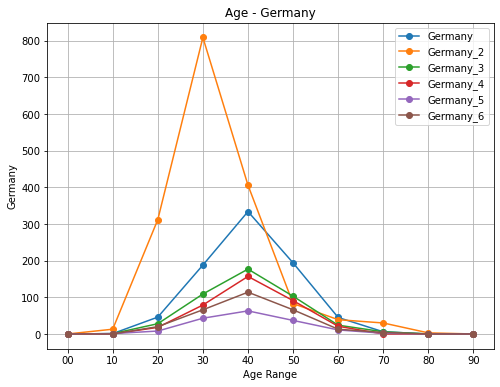

In [45]:
# 확인
age_ger = df[(df['Exited'] == 1) & (df['Geography'] == 'Germany')].groupby('AgeRange')['Geography'].count().reset_index()
age_ger_2 = df[(df['Exited'] == 0) & (df['Geography'] == 'Germany')].groupby('AgeRange')['Geography'].count().reset_index()
age_ger_3 = df[(df['Exited'] == 1) & (df['Geography'] == 'Germany') & (df['Gender'] == 'Female')].groupby('AgeRange')['Geography'].count().reset_index()
age_ger_4 = df[(df['Exited'] == 1) & (df['Geography'] == 'Germany') & (df['Gender'] == 'Male')].groupby('AgeRange')['Geography'].count().reset_index()
age_ger_5 = df[(df['Exited'] == 1) & (df['Geography'] == 'Germany') & (df['Gender'] == 'Female') & (df['IsActiveMember'] == 1)].groupby('AgeRange')['Geography'].count().reset_index()
age_ger_6 = df[(df['Exited'] == 1) & (df['Geography'] == 'Germany') & (df['Gender'] == 'Female') & (df['IsActiveMember'] == 0)].groupby('AgeRange')['Geography'].count().reset_index()
age_fra = df[(df['Exited'] == 1) & (df['Geography'] == 'France')].groupby('AgeRange')['Geography'].count().reset_index()
age_fra_2 = df[(df['Exited'] == 0) & (df['Geography'] == 'France')].groupby('AgeRange')['Geography'].count().reset_index()
age_spa = df[(df['Exited'] == 1) & (df['Geography'] == 'Spain')].groupby('AgeRange')['Geography'].count().reset_index()


plt.figure(figsize=(8, 6))

plt.plot(age_ger['AgeRange'], age_ger['Geography'], marker='o', label='Germany')
plt.plot(age_ger_2['AgeRange'], age_ger_2['Geography'], marker='o', label='Germany_2')
plt.plot(age_ger_3['AgeRange'], age_ger_3['Geography'], marker='o', label='Germany_3')
plt.plot(age_ger_4['AgeRange'], age_ger_4['Geography'], marker='o', label='Germany_4')
plt.plot(age_ger_5['AgeRange'], age_ger_5['Geography'], marker='o', label='Germany_5')
plt.plot(age_ger_6['AgeRange'], age_ger_6['Geography'], marker='o', label='Germany_6')
#plt.plot(age_fra['AgeRange'], age_fra['Geography'], marker='o', label='France')
#plt.plot(age_fra_2['AgeRange'], age_fra_2['Geography'], marker='o', label='France_2')
#plt.plot(age_spa['AgeRange'], age_spa['Geography'], marker='o', label='Spain')

plt.title('Age - Germany')
plt.xlabel('Age Range')
plt.ylabel('Germany')

plt.legend()

plt.grid(True)
plt.show()

확인에서 언급한 내용들을 토대로 그래프를 새로 그려본 결과  
-> 이탈자 키워드: 40대, Germany, 여성, 비활성  
-> 이탈자 키워드 대상으로 하는 프로모션 등을 생각해보는 것이 좋을 것 같다  

#### 제시할만한 것  
1. 40대는 비활성 이용자가 많으므로 40대 이용자를 활성화시킬수 있는 어떠한 방법을 마련하면 이탈률을 낮출 수 있을듯  
2. 50대에 불만이 있는 이용자가 많으므로 50대의 Complain을 줄일 수 있는 어떠한 방법을 마련하면 이탈률을 낮출 수 있을듯  
3. CreditScore, Balance, NumOfProducts 모두 겨냥한 40, 50대는 큰 특징이 없었지만 특이 케이스인 10, 70, 80대를 대상으로 하는 방안에 사용될 수 있을 것 같다

### IsActiveMember

#### Numeric

In [47]:
active_x = df[df['IsActiveMember'] == 0]
active_o = df[df['IsActiveMember'] == 1]

In [48]:
exit_customer = df[df['Exited'] == 1]
not_exit_customer = df[df['Exited'] == 0]

# Credit Score
iam_cs = df.groupby('IsActiveMember')['CreditScore'].mean().reset_index()
iam_cs_not_exit = not_exit_customer.groupby('IsActiveMember')['CreditScore'].mean().reset_index()
iam_cs_exit = exit_customer.groupby('IsActiveMember')['CreditScore'].mean().reset_index()

# 수정
iam_cs_0 = df[(df['IsActiveMember'] == 0) & (df['Exited'] == 1)]['CreditScore']
iam_cs_1 = df[(df['IsActiveMember'] == 1) & (df['Exited'] == 1)]['CreditScore']
iam_cs_2 = df[(df['IsActiveMember'] == 0) & (df['Exited'] == 0)]['CreditScore']
iam_cs_3 = df[(df['IsActiveMember'] == 1) & (df['Exited'] == 0)]['CreditScore']

# Balance
iam_b = df.groupby('IsActiveMember')['Balance'].mean().reset_index()
iam_b_not_exit = not_exit_customer.groupby('IsActiveMember')['Balance'].mean().reset_index()
iam_b_exit = exit_customer.groupby('IsActiveMember')['Balance'].mean().reset_index()

# 수정
iam_b_0 = df[(df['IsActiveMember'] == 0) & (df['Exited'] == 1)]['Balance']
iam_b_1 = df[(df['IsActiveMember'] == 1) & (df['Exited'] == 1)]['Balance']

# NumOfProducts
iam_n = df.groupby('IsActiveMember')['NumOfProducts'].mean().reset_index()
iam_n_not_exit = not_exit_customer.groupby('IsActiveMember')['NumOfProducts'].mean().reset_index()
iam_n_exit = exit_customer.groupby('IsActiveMember')['NumOfProducts'].mean().reset_index()

# 수정
iam_n_0 = df[(df['IsActiveMember'] == 0) & (df['Exited'] == 1)]['NumOfProducts']
iam_n_1 = df[(df['IsActiveMember'] == 1) & (df['Exited'] == 1)]['NumOfProducts']

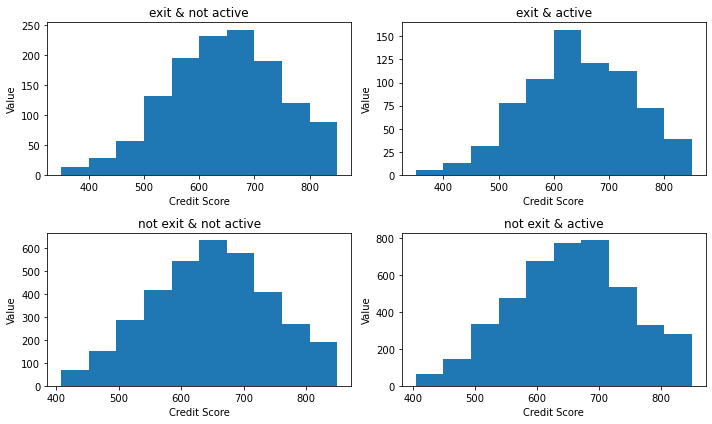

In [49]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.hist(iam_cs_0)
plt.title('exit & not active')
plt.xlabel('Credit Score')
plt.ylabel('Value')

plt.subplot(2, 2, 2)
plt.hist(iam_cs_1)
plt.title('exit & active')
plt.xlabel('Credit Score')
plt.ylabel('Value')

plt.subplot(2, 2, 3)
plt.hist(iam_cs_2)
plt.title('not exit & not active')
plt.xlabel('Credit Score')
plt.ylabel('Value')

plt.subplot(2, 2, 4)
plt.hist(iam_cs_3)
plt.title('not exit & active')
plt.xlabel('Credit Score')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

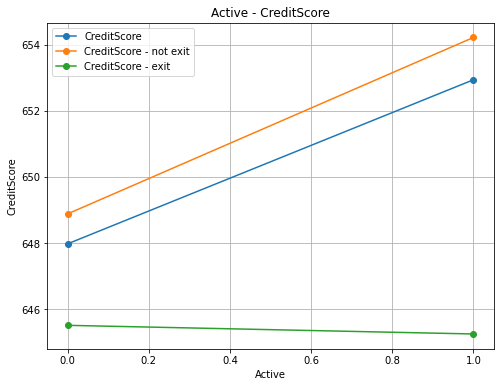

In [50]:
plt.figure(figsize=(8, 6))

plt.plot(iam_cs['IsActiveMember'], iam_cs['CreditScore'], marker='o', label='CreditScore')
plt.plot(iam_cs_not_exit['IsActiveMember'], iam_cs_not_exit['CreditScore'], marker='o', label='CreditScore - not exit')
plt.plot(iam_cs_exit['IsActiveMember'], iam_cs_exit['CreditScore'], marker='o', label='CreditScore - exit')

plt.title('Active - CreditScore')
plt.xlabel('Active')
plt.ylabel('CreditScore')

plt.legend()

plt.grid(True)
plt.show()

- 비활성 이탈자의 신용 점수가 활성 이탈자의 신용 점수보다 높게 분포되었다  
- 비활성 이탈자의 수도 활성 이탈자의 수보다 많게 계산되었다  
- 활성/비활성 이탈자 모두 신용 점수가 600-700 사이에 가장 많이 존재한다  
- 다수가 위치한 비활성이고 신용점수가 600-700에 위치한 사람들을 겨냥하는 방안을 마련

Text(0, 0.5, 'Value')

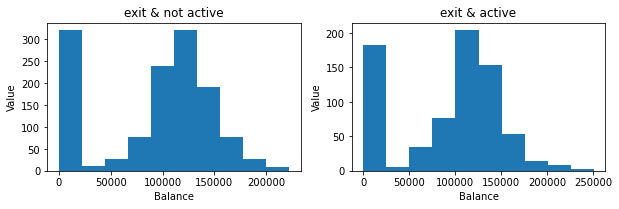

In [51]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.hist(iam_b_0)
plt.title('exit & not active')
plt.xlabel('Balance')
plt.ylabel('Value')

plt.subplot(2, 2, 2)
plt.hist(iam_b_1)
plt.title('exit & active')
plt.xlabel('Balance')
plt.ylabel('Value')

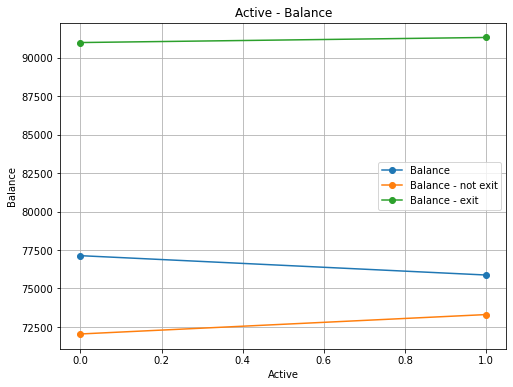

In [52]:
plt.figure(figsize=(8, 6))

plt.plot(iam_b['IsActiveMember'], iam_b['Balance'], marker='o', label='Balance')
plt.plot(iam_b_not_exit['IsActiveMember'], iam_b_not_exit['Balance'], marker='o', label='Balance - not exit')
plt.plot(iam_b_exit['IsActiveMember'], iam_b_exit['Balance'], marker='o', label='Balance - exit')

plt.title('Active - Balance')
plt.xlabel('Active')
plt.ylabel('Balance')

plt.legend()

plt.grid(True)
plt.show()

- 이탈: 활성/비활성의 분포가 비슷하다 (0-25000, 100000-150000 사이에 다수 위치) 그러나 비활성 이탈자의 수가 더 많다  
- 이탈한 사람들의 평균 잔액이 비교적 매우 높다 (활성 여부와는 관련 X)  
- 생각해볼 수 있는 내용은 잔액이 높은 경우 (그래프를 기준으로 한다면 90000 이상) 를 대상으로 한 해결책 마련  

Text(0, 0.5, 'Value')

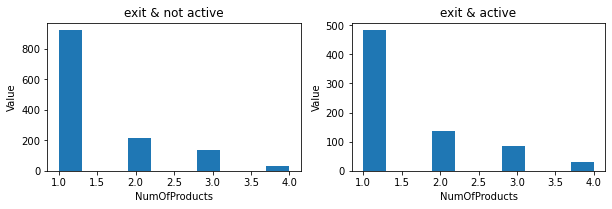

In [53]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.hist(iam_n_0)
plt.title('exit & not active')
plt.xlabel('NumOfProducts')
plt.ylabel('Value')

plt.subplot(2, 2, 2)
plt.hist(iam_n_1)
plt.title('exit & active')
plt.xlabel('NumOfProducts')
plt.ylabel('Value')

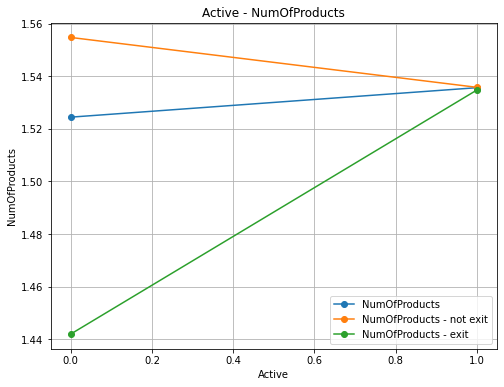

In [54]:
plt.figure(figsize=(8, 6))

plt.plot(iam_n['IsActiveMember'], iam_n['NumOfProducts'], marker='o', label='NumOfProducts')
plt.plot(iam_n_not_exit['IsActiveMember'], iam_n_not_exit['NumOfProducts'], marker='o', label='NumOfProducts - not exit')
plt.plot(iam_n_exit['IsActiveMember'], iam_n_exit['NumOfProducts'], marker='o', label='NumOfProducts - exit')

plt.title('Active - NumOfProducts')
plt.xlabel('Active')
plt.ylabel('NumOfProducts')

plt.legend()

plt.grid(True)
plt.show()

- 이탈: 활성/비활성의 분포가 비슷하다 (1개에 가장 많이 위치, 개수가 커질수록 인원수가 적어짐)  
- 인원수의 크기는 비활성인 경우가 더 많다   
- 다수의 이탈 인원수를 차지한 비활성 멤버 & 상품 보유 수가 적은 사람을 대상으로 한 해결책 마련  

#### String

In [55]:
exit_customer = df[df['Exited'] == 1]
not_exit_customer = df[df['Exited'] == 0]

organize_iam = pd.DataFrame()

# Geography
iam_gg = df.groupby('IsActiveMember')['Geography'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
iam_gg_not_exit = not_exit_customer.groupby('IsActiveMember')['Geography'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
iam_gg_exit = exit_customer.groupby('IsActiveMember')['Geography'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)

# Gender
iam_g = df.groupby('IsActiveMember')['Gender'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
iam_g_not_exit = not_exit_customer.groupby('IsActiveMember')['Gender'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
iam_g_exit = exit_customer.groupby('IsActiveMember')['Gender'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)

# Complain
iam_c = df.groupby('IsActiveMember')['Complain'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
iam_c_not_exit = not_exit_customer.groupby('IsActiveMember')['Complain'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
iam_c_exit = exit_customer.groupby('IsActiveMember')['Complain'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)

organize_iam['Geography'] = iam_gg
organize_iam['Geography_not_exit'] = iam_gg_not_exit
organize_iam['Geography_exit'] = iam_gg_exit
organize_iam['Gender'] = iam_g
organize_iam['Gender_not_exit'] = iam_g_not_exit
organize_iam['Gender_exit'] = iam_g_exit
organize_iam['Complain'] = iam_c
organize_iam['Complain_not_exit'] = iam_c_not_exit
organize_iam['Complain_exit'] = iam_c_exit
organize_iam

,Geography,Geography_not_exit,Geography_exit,Gender,Gender_not_exit,Gender_exit,Complain,Complain_not_exit,Complain_exit
IsActiveMember,,,,,,,,,
0,France,France,Germany,Male,Male,Female,0,0,1
1,France,France,France,Male,Male,Female,0,0,1


1. Geography
-> 이탈자 중 비활성 멤버만 Germany 거주자가 많다  
-> 이외에 이탈자 활성, 이탈X자 활성/비활성 모두 France 거주자가 많다  

2. Gender
-> 이탈하지 않은 사람은 활성/비활성 모두 남자가 많다  
-> 이탈한 사람은 활성/비활성 모두 여자가 많다 

3. Complain
-> 이탈하지 않은 사람은 활성/비활성 모두 불만이 없는 사람이 다수이다  
-> 이탈한 사람은 활성/비활성 모두 불만이 있는 사람이 다수이다

#### 확인해볼만한 것
- Active(0) X Geography(Germany)

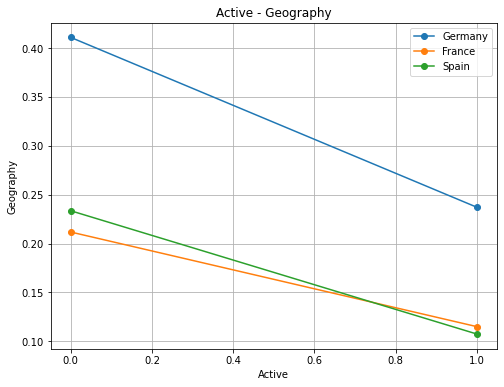

In [58]:
# 확인
ger_all = df[df['Geography'] == 'Germany'].groupby('IsActiveMember')['Geography'].count().reset_index()
fra_all = df[df['Geography'] == 'France'].groupby('IsActiveMember')['Geography'].count().reset_index()
spa_all = df[df['Geography'] == 'Spain'].groupby('IsActiveMember')['Geography'].count().reset_index()

active_ger = df[(df['Exited'] == 1) & (df['Geography'] == 'Germany')].groupby('IsActiveMember')['Geography'].count().reset_index()
active_ger_2 = df[(df['Exited'] == 0) & (df['Geography'] == 'Germany')].groupby('IsActiveMember')['Geography'].count().reset_index()
active_fra = df[(df['Exited'] == 1) & (df['Geography'] == 'France')].groupby('IsActiveMember')['Geography'].count().reset_index()
active_fra_2 = df[(df['Exited'] == 0) & (df['Geography'] == 'France')].groupby('IsActiveMember')['Geography'].count().reset_index()
active_spa = df[(df['Exited'] == 1) & (df['Geography'] == 'Spain')].groupby('IsActiveMember')['Geography'].count().reset_index()


plt.figure(figsize=(8, 6))

plt.plot(active_ger['IsActiveMember'], active_ger['Geography'] / ger_all['Geography'], marker='o', label='Germany')
#plt.plot(active_ger_2['IsActiveMember'], active_ger_2['Geography'], marker='o', label='Germany_2')
plt.plot(active_fra['IsActiveMember'], active_fra['Geography'] / fra_all['Geography'], marker='o', label='France')
#plt.plot(active_fra_2['IsActiveMember'], active_fra_2['Geography'], marker='o', label='France_2')
plt.plot(active_spa['IsActiveMember'], active_spa['Geography'] / spa_all['Geography'], marker='o', label='Spain')

plt.title('Active - Geography')
plt.xlabel('Active')
plt.ylabel('Geography')

plt.legend()

plt.grid(True)
plt.show()

- 스페인은 전체적으로 인원수가 적다  
- France와 Germany는 인원수는 비슷하고, 비활성일때는 Germany / 활성일때는 France가 약간씩 더 높다  
- 비활성인 인원이 활성인 인원보다 많다 (반대로 이탈하지 않는 경우 활성 인원이 비활성 인원보다 많다)

-> 비활성 인원(다수)에 대한 - 그 중에서도 Germany 거주자를 향한 내용의 방안이 필요함

### 제시할만한 것
1. Gender와 Complain은 활성/비활성으로 값이 달라지지 않았으므로 해당 컬럼과 큰 관계가 없음
2. 활성 멤버이지만 신용 점수가 낮은 경우 (그래프를 기준으로 한다면 646 이하) 의 사람들을 대상으로 한 방안
3. 잔액이 높은 경우 (그래프를 기준으로 한다면 90000 이상) 를 대상으로 한 방안 (활성 여부와는 관계X)
4. 활성 멤버이지만 신용 점수가 낮은 경우 (그래프를 기준으로 한다면 646 이하) 의 사람들을 대상으로 한 방안

### Gender

#### Numeric 

In [59]:
exit_customer = df[df['Exited'] == 1]
not_exit_customer = df[df['Exited'] == 0]

# Credit Score
gen_cs = df.groupby('Gender')['CreditScore'].mean().reset_index()
gen_cs_not_exit = not_exit_customer.groupby('Gender')['CreditScore'].mean().reset_index()
gen_cs_exit = exit_customer.groupby('Gender')['CreditScore'].mean().reset_index()

# 수정
gen_cs_m = df[(df['Gender'] == 'Male') & (df['Exited'] == 1)]['CreditScore']
gen_cs_f = df[(df['Gender'] == 'Female') & (df['Exited'] == 1)]['CreditScore']

# Balance
gen_b = df.groupby('Gender')['Balance'].mean().reset_index()
gen_b_not_exit = not_exit_customer.groupby('Gender')['Balance'].mean().reset_index()
gen_b_exit = exit_customer.groupby('Gender')['Balance'].mean().reset_index()

# 수정
gen_b_m = df[(df['Gender'] == 'Male') & (df['Exited'] == 1)]['Balance']
gen_b_f = df[(df['Gender'] == 'Female') & (df['Exited'] == 1)]['Balance']

# NumOfProducts
gen_n = df.groupby('Gender')['NumOfProducts'].mean().reset_index()
gen_n_not_exit = not_exit_customer.groupby('Gender')['NumOfProducts'].mean().reset_index()
gen_n_exit = exit_customer.groupby('Gender')['NumOfProducts'].mean().reset_index()

# 수정
gen_n_m = df[(df['Gender'] == 'Male') & (df['Exited'] == 1)]['NumOfProducts']
gen_n_f = df[(df['Gender'] == 'Female') & (df['Exited'] == 1)]['NumOfProducts']

Text(0, 0.5, 'Value')

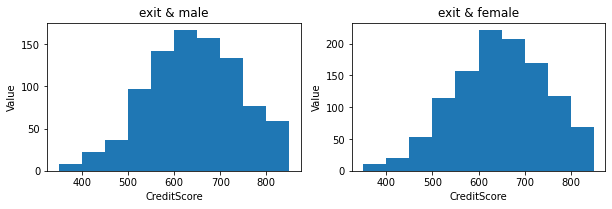

In [60]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.hist(gen_cs_m)
plt.title('exit & male')
plt.xlabel('CreditScore')
plt.ylabel('Value')

plt.subplot(2, 2, 2)
plt.hist(gen_cs_f)
plt.title('exit & female')
plt.xlabel('CreditScore')
plt.ylabel('Value')

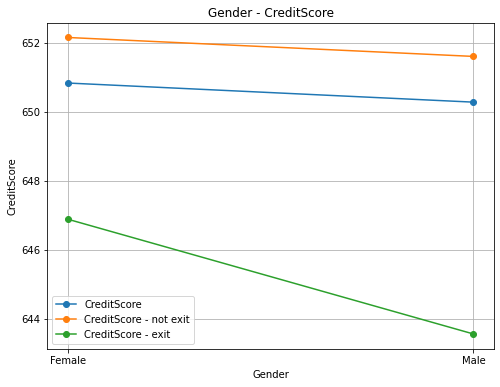

In [61]:
plt.figure(figsize=(8, 6))

plt.plot(gen_cs['Gender'], gen_cs['CreditScore'], marker='o', label='CreditScore')
plt.plot(gen_cs_not_exit['Gender'], gen_cs_not_exit['CreditScore'], marker='o', label='CreditScore - not exit')
plt.plot(gen_cs_exit['Gender'], gen_cs_exit['CreditScore'], marker='o', label='CreditScore - exit')

plt.title('Gender - CreditScore')
plt.xlabel('Gender')
plt.ylabel('CreditScore')

plt.legend()

plt.grid(True)
plt.show()

- 이탈한 사람들의 신용 점수가 이탈하지 않은 사람들의 신용도보다 낮다  
- 이탈: 남자/여자 신용 점수가 모두 600-700 사이에 크게 분포되어 있지만 남자의 신용도가 조금 더 낮은 것을 확인할 수 있다  
- 그러나 이탈 인원수 자체는 여자가 더 많아 보인다  
- 많은 수가 위치하는 600-700 사이 신용 점수의 사람들을 대상으로 하는 방안을 제시하면 이탈률을 낮출 수 있을지도  
- 키워드: 이탈 - 여자 - 600~700 사이

Text(0, 0.5, 'Value')

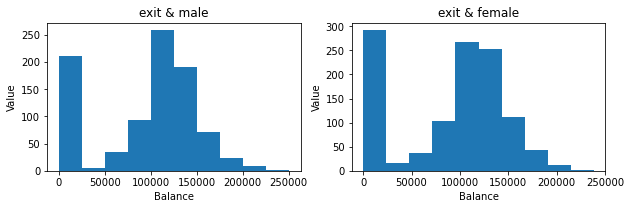

In [62]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.hist(gen_b_m)
plt.title('exit & male')
plt.xlabel('Balance')
plt.ylabel('Value')

plt.subplot(2, 2, 2)
plt.hist(gen_b_f)
plt.title('exit & female')
plt.xlabel('Balance')
plt.ylabel('Value')

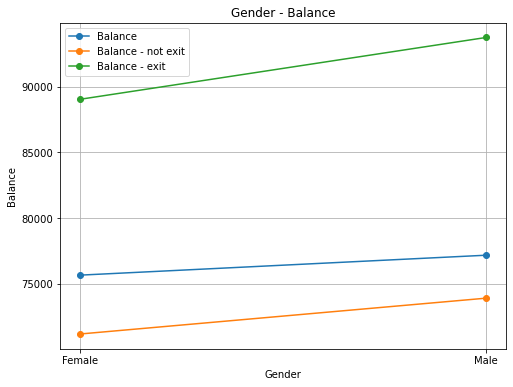

In [63]:
plt.figure(figsize=(8, 6))

plt.plot(gen_b['Gender'], gen_b['Balance'], marker='o', label='Balance')
plt.plot(gen_b_not_exit['Gender'], gen_b_not_exit['Balance'], marker='o', label='Balance - not exit')
plt.plot(gen_b_exit['Gender'], gen_b_exit['Balance'], marker='o', label='Balance - exit')

plt.title('Gender - Balance')
plt.xlabel('Gender')
plt.ylabel('Balance')

plt.legend()

plt.grid(True)
plt.show()

- 이탈자의 잔액이 이탈하지 않은 사람들의 잔액보다 비교적 높다  
- 이탈: 남자의 잔액이 여자보다 높다  
- 남자/여자 이탈자 모두 100000-150000 사이에 많이 위치하지만 남자는 100000에 가까운 쪽에 더 많이 위치하고, 여자는 150000에 가까운 쪽에 더 많이 위치한다  
- 잔액이 높은 (그래프를 기준으로 90000 이상) 남자를 대상으로 하는 해결책 마련   
- 잔액이 높다는건 은행의 고액거래자? VIP? 일 것 같은데 해당 고객층이 이탈하지 않도록 혜택을 제공하는 방법도 좋을듯

Text(0, 0.5, 'Value')

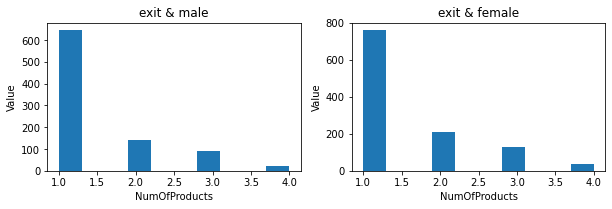

In [64]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.hist(gen_n_m)
plt.title('exit & male')
plt.xlabel('NumOfProducts')
plt.ylabel('Value')

plt.subplot(2, 2, 2)
plt.hist(gen_n_f)
plt.title('exit & female')
plt.xlabel('NumOfProducts')
plt.ylabel('Value')

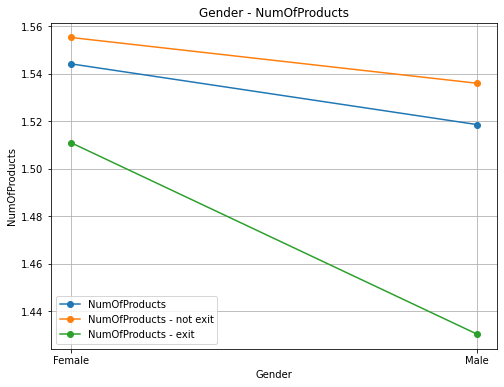

In [65]:
plt.figure(figsize=(8, 6))

plt.plot(gen_n['Gender'], gen_n['NumOfProducts'], marker='o', label='NumOfProducts')
plt.plot(gen_n_not_exit['Gender'], gen_n_not_exit['NumOfProducts'], marker='o', label='NumOfProducts - not exit')
plt.plot(gen_n_exit['Gender'], gen_n_exit['NumOfProducts'], marker='o', label='NumOfProducts - exit')

plt.title('Gender - NumOfProducts')
plt.xlabel('Gender')
plt.ylabel('NumOfProducts')

plt.legend()

plt.grid(True)
plt.show()

- 이탈자의 상품 보유 수가 비교적 적은 편이다
- 이탈: 남자의 상품 보유 수 평균 값이 여자보다 적다 - 여자가 많다
- 상품 보유 개수가 1인 이탈자의 수는 남자보다 여자가 더 많다
- 보유 수가 적은 (1개) 여자를 대상으로 하는 방안

#### String

In [66]:
exit_customer = df[df['Exited'] == 1]
not_exit_customer = df[df['Exited'] == 0]

organize_gen = pd.DataFrame()

# Geography
gen_gg = df.groupby('Gender')['Geography'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
gen_gg_not_exit = not_exit_customer.groupby('Gender')['Geography'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
gen_gg_exit = exit_customer.groupby('Gender')['Geography'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)

# Complain
gen_c = df.groupby('Gender')['Complain'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
gen_c_not_exit = not_exit_customer.groupby('Gender')['Complain'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
gen_c_exit = exit_customer.groupby('Gender')['Complain'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)

organize_gen['Geography'] = gen_gg
organize_gen['Geography_not_exit'] = gen_gg_not_exit
organize_gen['Geography_exit'] = gen_gg_exit
organize_gen['Complain'] = gen_c
organize_gen['Complain_not_exit'] = gen_c_not_exit
organize_gen['Complain_exit'] = gen_c_exit
organize_gen

,Geography,Geography_not_exit,Geography_exit,Complain,Complain_not_exit,Complain_exit
Gender,,,,,,
Female,France,France,France,0,0,1
Male,France,France,Germany,0,0,1


1. Geography
-> 이탈자 남자의 경우에만 거주지가 Germany인 사람이 많다  
-> 이외의 경우는 모두 거주지가 France인 사람이 다수이다  

2. Complain 
-> 이탈하지 않은 경우 성별과 상관없이 불만이 없는 사람이 다수이다  
-> 이탈한 경우 성별과 상관없이 불만이 있는 사람이 다수이다  
-> 성별에 따른 차이가 보이지 않으므로 유의미한 결과는 X  

#### 확인해볼만한 것
1. Gender(Male) X Geography(Germany)

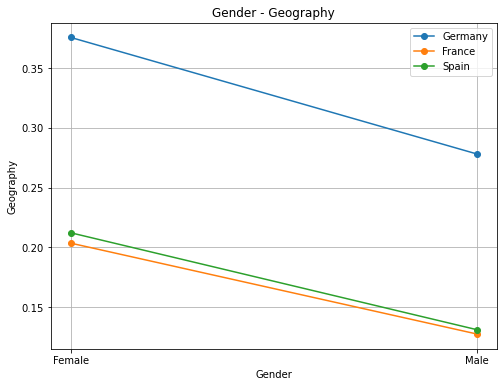

In [68]:
# 확인
ger_all = df[df['Geography'] == 'Germany'].groupby('Gender')['Geography'].count().reset_index()
fra_all = df[df['Geography'] == 'France'].groupby('Gender')['Geography'].count().reset_index()
spa_all = df[df['Geography'] == 'Spain'].groupby('Gender')['Geography'].count().reset_index()

gender_ger = df[(df['Exited'] == 1) & (df['Geography'] == 'Germany')].groupby('Gender')['Geography'].count().reset_index()
gender_ger_2 = df[(df['Exited'] == 0) & (df['Geography'] == 'Germany')].groupby('Gender')['Geography'].count().reset_index()
gender_fra = df[(df['Exited'] == 1) & (df['Geography'] == 'France')].groupby('Gender')['Geography'].count().reset_index()
gender_fra_2 = df[(df['Exited'] == 0) & (df['Geography'] == 'France')].groupby('Gender')['Geography'].count().reset_index()
gender_spa = df[(df['Exited'] == 1) & (df['Geography'] == 'Spain')].groupby('Gender')['Geography'].count().reset_index()


plt.figure(figsize=(8, 6))

plt.plot(gender_ger['Gender'], gender_ger['Geography'] / ger_all['Geography'], marker='o', label='Germany')
#plt.plot(gender_ger_2['Gender'], gender_ger_2['Geography'], marker='o', label='Germany_2')
plt.plot(gender_fra['Gender'], gender_fra['Geography'] / fra_all['Geography'], marker='o', label='France')
#plt.plot(gender_fra_2['Gender'], gender_fra_2['Geography'], marker='o', label='France_2')
plt.plot(gender_spa['Gender'], gender_spa['Geography'] / spa_all['Geography'], marker='o', label='Spain')

plt.title('Gender - Geography')
plt.xlabel('Gender')
plt.ylabel('Geography')

plt.legend()

plt.grid(True)
plt.show()

- 스페인은 전체적으로 인원수가 적다
- France와 Germany는 인원수는 비슷하고, 남자는 Germany / 여자는 France가 약간씩 더 높다
- 이탈자 중 여자가 남자보다 인원수가 많다

-> 여자(다수) - 그중에서도 France 거주자를 향한 내용의 방안이 필요함  
-> 특이점이 나타난 남자, Germany 거주자를 향한 내용의 방안도 생각해볼 필요 O

#### 제시할만한 것
1. 신용도가 낮은 (그래프를 기준으로 한다면 646 또는 644 이하) 남자를 대상으로 한 방안  
2. 잔액이 높은 (그래프를 기준으로 90000 이상) 남자를 대상으로 하는 방안 (고액거래자를 저격한 혜택?)  
3. 보유 수가 적은 (1개 이하?) 남자를 대상으로 하는 해결책 마련

# 3. Column 세부 분석 (Age)

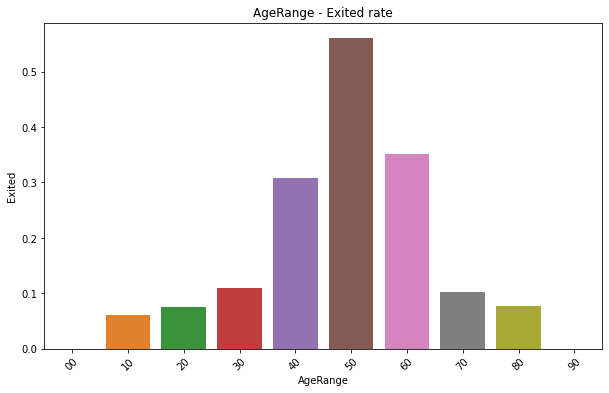

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeRange', y='Exited', data=age_exit_mean)
plt.title('AgeRange - Exited rate')
plt.xlabel('AgeRange')
plt.ylabel('Exited')
plt.xticks(rotation=45)
plt.show()

연령대 별 평균 이탈률은 50대가 가장 높다

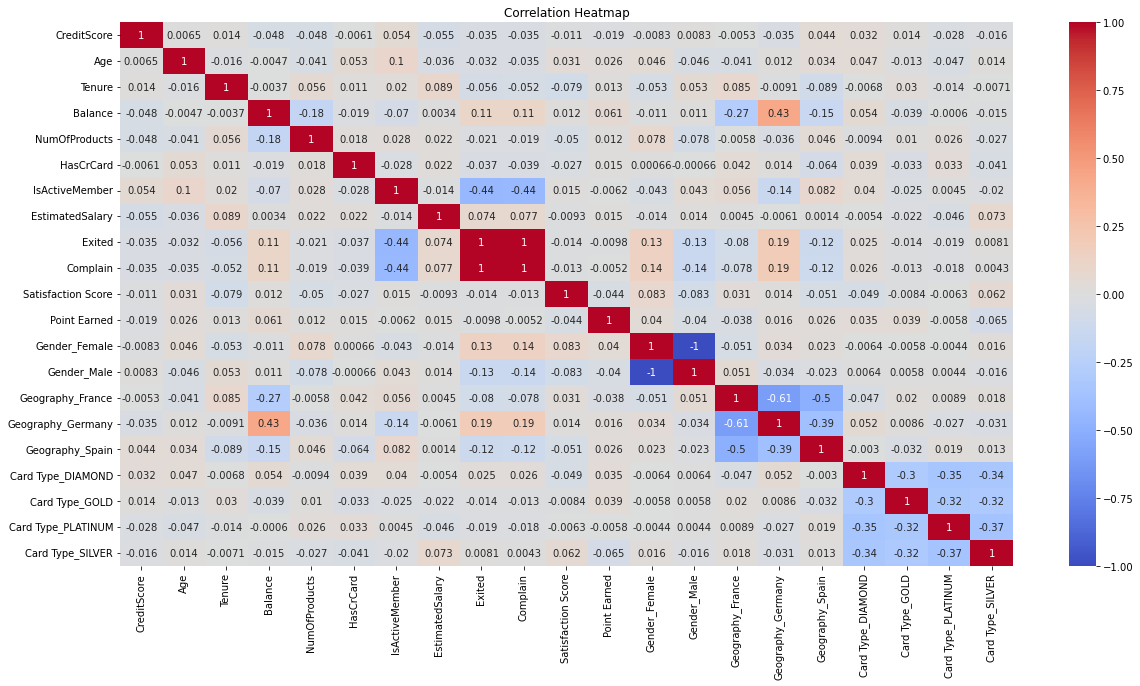

In [10]:
df_num = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

df_num = pd.get_dummies(df_num, columns=['Gender', 'Geography', 'Card Type'])
df_num = df_num[(df_num['Age'] >= 50) & (df_num['Age'] < 60)]

plt.figure(figsize=(20, 10))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

50대로 나이를 필터링한 데이터 셋을 대상으로 히트맵을 그려본 결과
- Exited와 상관관계 값이 큰 컬럼은 Complain, IsActiveMember, Balance, Geography - Germany로 네 가지이다
- 독일은 확정

따라서 50대 독일 거주자들이 많이 이탈할 것이다
- 왜 이탈했을까? 더 이상 은행을 사용하지 않기 때문 아닐까?
- 첫 번째 가설: 비활성 고객이 많이 이탈할 것이다 (계좌를 비활성화 해놨다면 은행을 옮길 가능성이 크지 않을까?)

## IsActiveMember

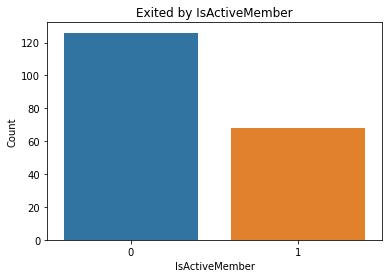

In [15]:
df_i = df[(df['Age'] >= 50) & (df['Age'] < 60) & (df['Geography'] == 'Germany')].groupby('IsActiveMember')['Exited'].sum().reset_index()

sns.barplot(x='IsActiveMember', y='Exited', data=df_i)
plt.title('Exited by IsActiveMember')
plt.xlabel('IsActiveMember')
plt.ylabel('Count')
plt.show()

비활성 멤버가 많이 이탈한다 (첫 번째 가설이 맞았다)
- 사실 계좌를 비활성한 사람은 해당 은행의 새로운 계좌를 만드는 등의 이유가 아닌 이상 은행을 옮기는 경우일 가능성이 높기 때문에 당연한 결과라고 생각된다

그렇다면 왜 독일에 거주하는 50대 고객들은 계좌를 비활성 했을까?
- 50대는 보통 평균 연봉이 높고, 모아둔 돈이 많을 것이다 (X)
- 밑에서 그래프를 그려보니 50대는 평균 연봉이 낮은 편이었다
- 그렇다면 잔액이 낮은 사람이 활용하기 어려운 은행이기 때문이 아닐까?
- 두 번째 가설: 독일에 거주하는 50대 비활성 고객이 이탈하는 이유는 잔액이 적어서 일 것이다

+) 50대는 연봉이 높다?

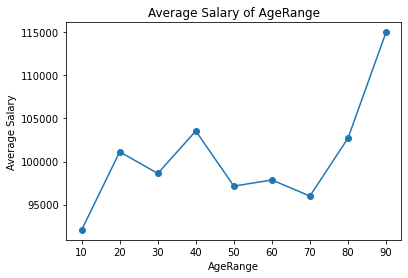

In [16]:
df_s = df.groupby('AgeRange')['EstimatedSalary'].mean().reset_index()

plt.plot(df_s['AgeRange'], df_s['EstimatedSalary'], marker='o', label='Salary')
plt.title('Average Salary of AgeRange')
plt.xlabel('AgeRange')
plt.ylabel('Average Salary')
plt.show()

## Balance

In [17]:
df['Balance'].agg(['min', 'max', 'mean', 'median'])

min            0.000000
max       250898.090000
mean       76485.889288
median     97198.540000
Name: Balance, dtype: float64

In [18]:
balance_bins = range(0, 275001, 25000)
balance_labels = ['0', '25k', '50k', '75k', '100k', '125k', '150k', '175k', '200k', '225k', '250k']

df['BalanceRange'] = pd.cut(df['Balance'], bins=balance_bins, labels=balance_labels, right=False)

count_0 = df[df['Balance'] == 0].shape[0]
count_0

3617

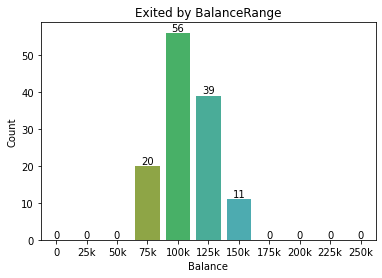

In [25]:
df_b = df[(df['Age'] >= 50) & (df['Age'] < 60) & (df['Geography'] == 'Germany') & (df['IsActiveMember'] == 0)].groupby('BalanceRange')['Exited'].sum().reset_index()

sns.barplot(x='BalanceRange', y='Exited', data=df_b)
for index, row in df_b.iterrows():
    plt.text(index, row['Exited'], str(row['Exited']), ha='center', va='bottom')
plt.title('Exited by BalanceRange')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.show()

#### 필터링을 다시 해보니 잔액이 0인 고객이 없다고 출력되었으므로 삭제
생각할 필요가 있는 부분: 잔액이 0인 고객들을 따로 생각해야할까?
- 잔액이 0인 고객이 무려 전체의 36%를 차지하고 있음
- 데이터 셋이 따로 설명이 없기 때문에 상황을 설정해보자면 이전에 사용했지만 이젠 더이상 사용하지 않는 경우 또는 월급 통장 등 실사용 계좌가 아니라 거쳐가는 용도로 사용하는 경우  
- 밑에서 활성 여부로 인원수를 계산해봤는데 정확히 반반으로 나뉘었다... 두 가지 경우 모두 생각해볼 필요가 있을듯

어쨌든 50대에서 100k-125k의 잔액을 소유하는 사람이 가장 많이 이탈한다
- 100k-125k는 Balance Column의 중간값, 평균값보다 큰 수이므로 잔액이 많은 경우라고 판단할 수 있다

따라서 잔액이 많은 50대 독일 거주자가 많이 이탈한다 (두 번째 가설이 틀렸다)
- 왜? 잔액이 많은 고액거래자이지만 은행으로부터 혜택이 별로 없어서일까?
- 세 번째 가설: 잔액이 많은 50대가 이탈하는 이유는 은행에 대한 불만이 많아서 일 것이다

- +) 세번째 가설_2: 잔액이 0인 50대 독일 거주자가 많이 이탈한다

In [20]:
df_cal = df[df['IsActiveMember'] == 1].groupby('BalanceRange')['IsActiveMember'].count().reset_index()
df_cal

,BalanceRange,IsActiveMember
0,0,1876
1,25k,37
2,50k,202
3,75k,593
4,100k,1064
5,125k,894
6,150k,371
7,175k,99
8,200k,13
9,225k,1


## Complain

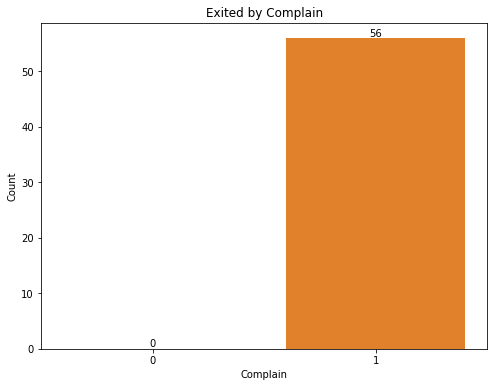

In [21]:
df_c = df[(df['Age'] >= 50) & (df['Age'] < 60) & (df['Geography'] == 'Germany') & (df['Balance'] >= 100000) & (df['Balance'] < 125000) & (df['IsActiveMember'] == 0)].groupby('Complain')['Exited'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Complain', y='Exited', data=df_c)
for index, row in df_c.iterrows():
    plt.text(index, row['Exited'], str(row['Exited']), ha='center', va='bottom')
plt.title('Exited by Complain')
plt.xlabel('Complain')
plt.ylabel('Count')
plt.show()

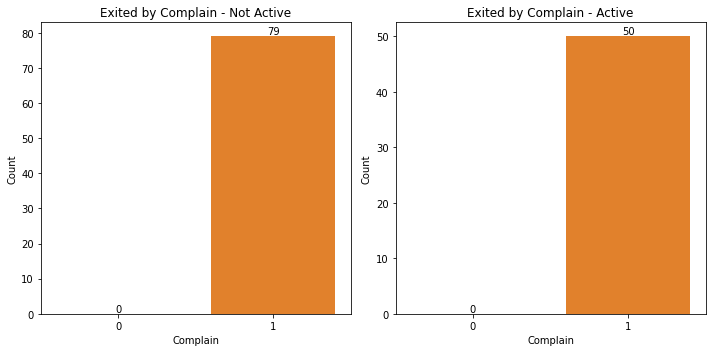

In [71]:
df_c2 = df[(df['Age'] >= 50) & (df['Age'] < 60) & (df['Balance'] == 0) & (df['IsActiveMember'] == 0)].groupby('Complain')['Exited'].sum().reset_index()
df_c22 = df[(df['Age'] >= 50) & (df['Age'] < 60) & (df['Balance'] == 0) & (df['IsActiveMember'] == 1)].groupby('Complain')['Exited'].sum().reset_index()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='Complain', y='Exited', data=df_c2)
for index, row in df_c2.iterrows():
    plt.text(index, row['Exited'], str(row['Exited']), ha='center', va='bottom')
plt.title('Exited by Complain - Not Active')
plt.xlabel('Complain')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.barplot(x='Complain', y='Exited', data=df_c22)
for index, row in df_c22.iterrows():
    plt.text(index, row['Exited'], str(row['Exited']), ha='center', va='bottom')
plt.title('Exited by Complain - Active')
plt.xlabel('Complain')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

#### 필터링을 다시 해보니 잔액이 0인 고객이 없다고 출력되었으므로 삭제

불만사항이 있는 경우에만 이탈한다
- 불만이 없는 사람은 이탈하지 않는다는 극단적인 결과가 출력되었다
- 그렇기 때문에 독일에 거주하는 50대 고액 거래자의 불만을 해소시킨다면 이탈률이 줄어들 것 같다

그렇다면 왜 불만이 있을까? 여러 가지 이유를 생각해 볼 수 있다
- 은행 서비스의 문제 (은행 앱의 불편함, 적은 수의 오프라인 은행, 사용이 어려움)
- 돈의 문제 (계좌 유지비/수수료 등이 많이 필요, 적립금/이자 등의 혜택 부족)

생각해볼 수 있는 해결 방안 (일정 금액 이상 계좌에 존재한다면을 전제로 한다)
- 계좌 유지비를 면제 or 수수료를 감액
- 쇼핑 리워드, 이자 지급 등의 혜택 만들기
- 어플 개선 (50대 이상이라면... 어플이 복잡해서 사용의 어려움을 느꼈을 수 있다고 생각)

그렇다면 잔액이 0원인 고객은? 
- 비활성은... 솔직히 이미 마음이 떠난 고객 같아서 이탈을 막는 방법이 잘 안떠오른다
- 하지만 활성되어있는데도 이탈하는 사람이 꽤 큰 비율을 차지한다
- 만들어놓고 잔액이 0원인 이유는 다른 은행에 비해 불편하거나 이득이 없다고 생각해서 아닐까?
- 그렇다면 처음 계좌를 만든 사람 혹은 돌아온 사람 (복귀유저...) 에게 혜택을 주는 방식도 좋을 것 같다

# 4. 결론 및 마케팅 제안

독일에 거주하는 50대 비활성 고액 거래자의 불만을 해소한다면 이탈률은 줄어들 것이라고 결론을 내렸다.

1. Is Active Member, Complain
- 이탈률이 높은 50대에서는 비활성 고객인 경우 이탈의 가능성이 크고, 불만을 가지는 경우 바로 이탈로 이어지는 것으로 분석되었다.
- 불만을 가지고 비활성 고객이 되는 이유로는 은행 어플의 불편함, 적은 수의 오프라인 은행, 계좌 개설 및 송금 등 서비스 사용의 어려움 등의 문제가 있을 수 있다.
- 어플을 지속적으로 개선하여 사용자, 특히 나이대가 높은 고객들이 사용하기 쉽도록 한다면 50대의 이탈률도 줄어들 것이 기대된다.


2. Geography - Germany, Balance 
- 이탈률이 높은 50대의 보유 잔액은 많은 편으로 분석되었다.
- 계좌 유지비/수수료 등이 요구되지만 적립금/이자 등의 혜택이 부족한 문제가 있을 수 있다.
- 독일의 은행 중 하나인 코메르츠에서는 매월 일정 금액 이상 계좌로 돈을 입금하면 존재하면 계좌 유지비를 면제해준다는 내용을 확인할 수 있었다. 따라서 고객 이탈의 해결방안으로써 코메르츠 은행의 기획을 참고하여 잔액이 많은 고객의 이탈을 막는 방안을 구상하면 좋을 것 같다.
- 또한 쇼핑 리워드 등의 카드 혜택을 추가하는 방안도 생각해볼 수 있다.
